# EDA metadata

In [1]:
# Importo librerias

import pandas as pd
import numpy as np
import missingno as msxo
import matplotlib.pyplot as plt
import glob
import folium
import plotly.express as px
import re

Lectura de los archivos de metadata de los negocios de google. Esta metadata nos es util para poder cruzarla con las reviews y poder tener toda la informacion como conjunta

In [2]:
df_1 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\1.json', lines= True)
df_1.head()


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [3]:
df_2 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\2.json', lines= True)
df_3 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\3.json', lines= True)
df_4 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\4.json', lines= True)
df_5 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\5.json', lines= True)
df_6 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\6.json', lines= True)
df_7 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\7.json', lines= True)
df_8 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\8.json', lines= True)
df_9 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\9.json', lines= True)
df_10 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\10.json', lines= True)
df_11 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\11.json', lines= True)


In [4]:
dfs = []


for i in range(1, 12):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


merged_df = pd.concat(dfs, ignore_index=True)

In [6]:
# Checkeo de nulos y su porcentaje

nulls_FL = pd.DataFrame(merged_df.isnull().sum().sort_values(ascending = False))
nulls_FL["Porcentaje de nulos"] = round(nulls_FL/merged_df.shape[0]*100,2)
nulls_FL.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
description,2770722,91.59
price,2749808,90.90
hours,787405,26.03
state,746455,24.68
MISC,690834,22.84
relative_results,295058,9.75
address,80511,2.66
category,17419,0.58
name,37,0.00
gmap_id,0,0.00


In [7]:
#elimino las columnas que tienen mas de 85% de nulos
columnas= ['description','price']
merged_df= merged_df.drop(columns=columnas)

In [8]:
merged_df.shape 

(3025011, 13)

La union de todos los archivos de la carpeta metadata la pongo en un csv y lo copio en o tra carpeta para no acargarlo al github

In [9]:

# merged_df.to_csv('Metadata.csv', index=False, escapechar='\\')


In [2]:
metadata= pd.read_csv(r'C:\Users\flori\Desktop\LOCAL\Metadata.csv')
metadata.head()

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,['Pharmacy'],4.9,16,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.215290,['Textile exporter'],4.5,6,NaN,NaN,Open now,"['0x80c2c624136ea88b:0xb0315367ed448771', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,['Korean restaurant'],4.4,18,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,['Fabric store'],3.3,6,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"['0x80c2c8811477253f:0x23a8a492df1918f7', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,['Fabric store'],4.3,7,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"['0x80c2c62c496083d1:0xdefa11317fe870a1', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


In [3]:
metadata.shape

(3025011, 13)

In [4]:
metadata.columns

Index(['name', 'address', 'gmap_id', 'latitude', 'longitude', 'category',
       'avg_rating', 'num_of_reviews', 'hours', 'MISC', 'state',
       'relative_results', 'url'],
      dtype='object')

In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   latitude          float64
 4   longitude         float64
 5   category          object 
 6   avg_rating        float64
 7   num_of_reviews    int64  
 8   hours             object 
 9   MISC              object 
 10  state             object 
 11  relative_results  object 
 12  url               object 
dtypes: float64(3), int64(1), object(9)
memory usage: 300.0+ MB


In [6]:
#chequeo nulos
metadata.category.isna().sum()

17419

In [7]:
# en los nulos completo con valor vacio
metadata['category'].fillna("", inplace=True)

In [8]:
metadata['category'].unique()

array(["['Pharmacy']", "['Textile exporter']", "['Korean restaurant']",
       ..., "['Travellers lodge', 'Tour agency']",
       "['Deli', 'Coffee shop', 'Takeout Restaurant', 'Sandwich shop']",
       "['Truck dealer', 'Car dealer', 'Car repair and maintenance', 'RV repair shop', 'Truck repair shop']"],
      dtype=object)

In [15]:
#realizo un sort de numero de reviews y agarro las primeras 40 que aparecen
masreviewa= metadata[['num_of_reviews', 'name']]
orden=masreviewa.sort_values(ascending=False, by='num_of_reviews')
top40=orden.head(40)

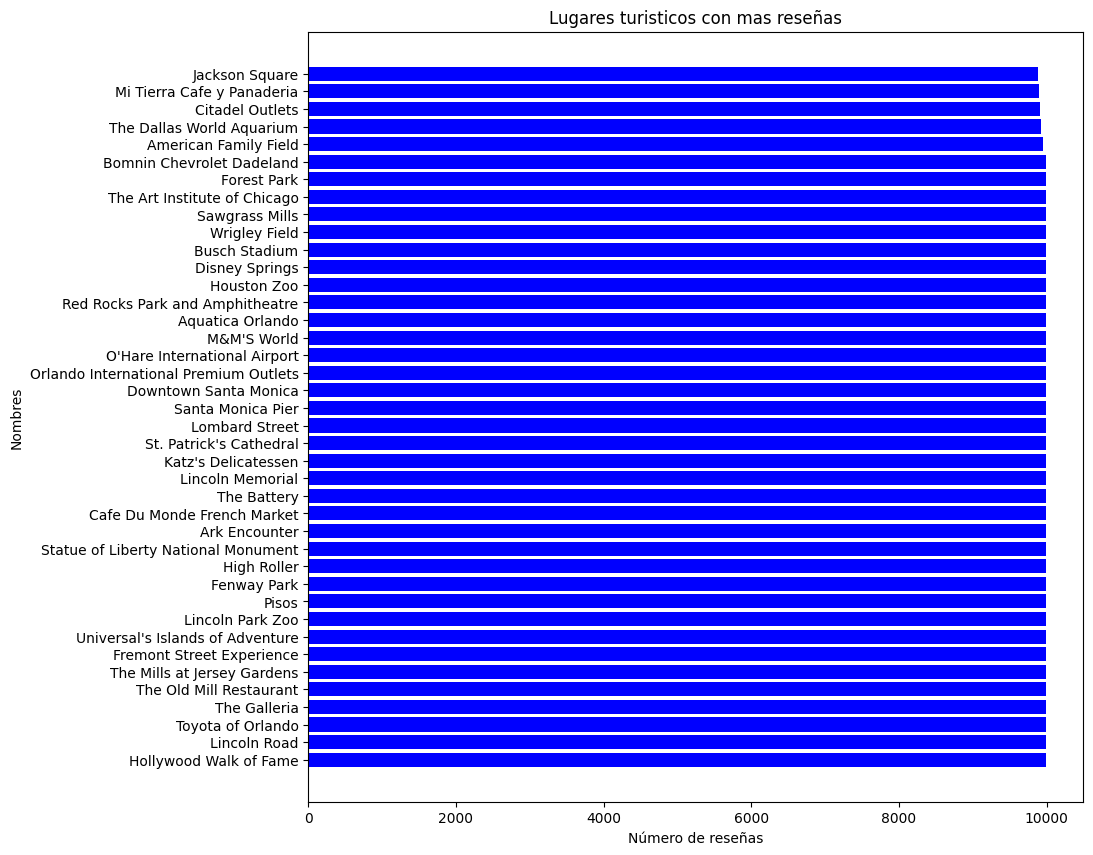

In [17]:

plt.figure(figsize=(10, 10))
plt.barh(top40['name'], top40['num_of_reviews'], color='blue')
plt.xlabel('Número de reseñas')
plt.ylabel('Nombres')
plt.title('Lugares turisticos con mas reseñas')
plt.show()

Puedo ver la variedad de lugares que hay, desde parques de entretenimiento hasta iglesias, restaurantes, zologicos, incluso shoppings

In [11]:
# Agrupo cantidad de reviews por categoria
cate= metadata[['category','name']].groupby('avg_rating').count()
cate_sorted= cate.sort_values(ascending=False, by='name')
cate_sorted10=cate_sorted.head(10)

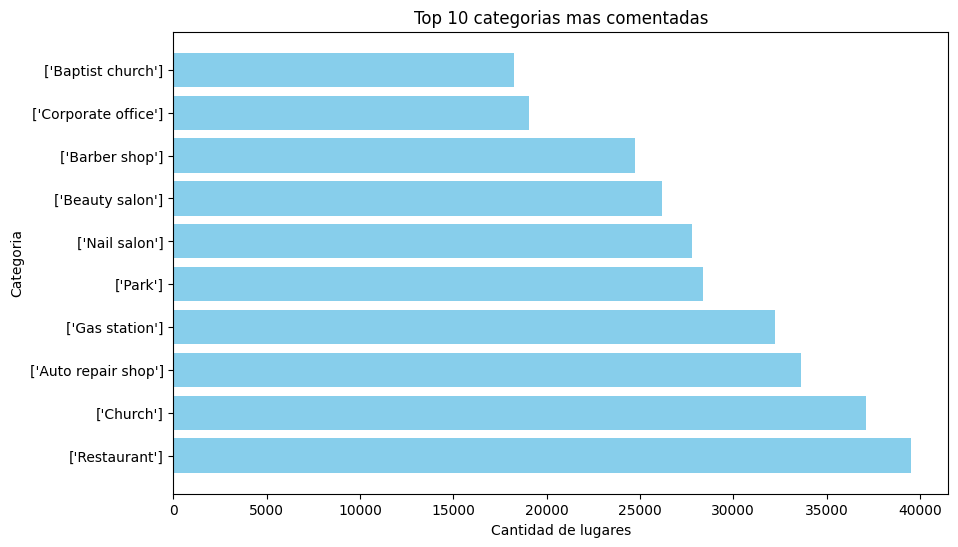

In [13]:
#Grafico el top 10 de categorias mas comentadas
plt.figure(figsize=(10, 6))
plt.barh(cate_sorted10.index, cate_sorted10['name'], color='skyblue')
plt.xlabel('Cantidad de lugares')
plt.ylabel('Categoria')
plt.title('Top 10 categorias mas comentadas')
plt.show()

(-1.099999268531531,
 1.0999998975855343,
 -1.099999717826094,
 1.0999999725032714)

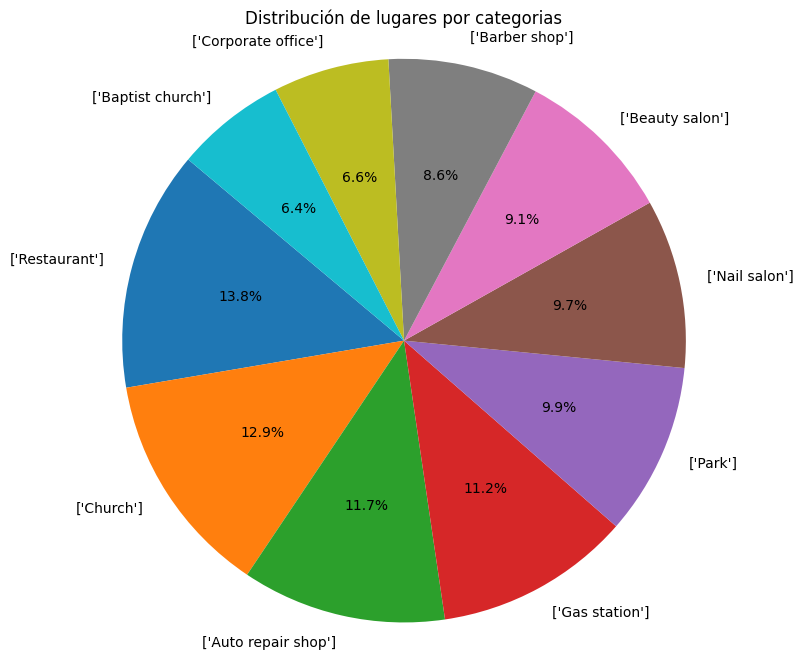

In [14]:
## aca lo mismo pero en grafico de barras
plt.figure(figsize=(8, 8))
plt.pie(cate_sorted10['name'], labels=cate_sorted10.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de lugares por categorias')
plt.axis('equal') 

In [22]:
# Agrupo cantidad de reviews por categoria
avg= metadata[['avg_rating','num_of_reviews']].groupby('avg_rating').count()
avg_sorted= avg.sort_values(ascending=False, by='num_of_reviews')
avg_sorted10=avg_sorted.head(10)

(-1.0999998505196744,
 1.0999999779581615,
 -1.0999998912945261,
 1.0999999910257439)

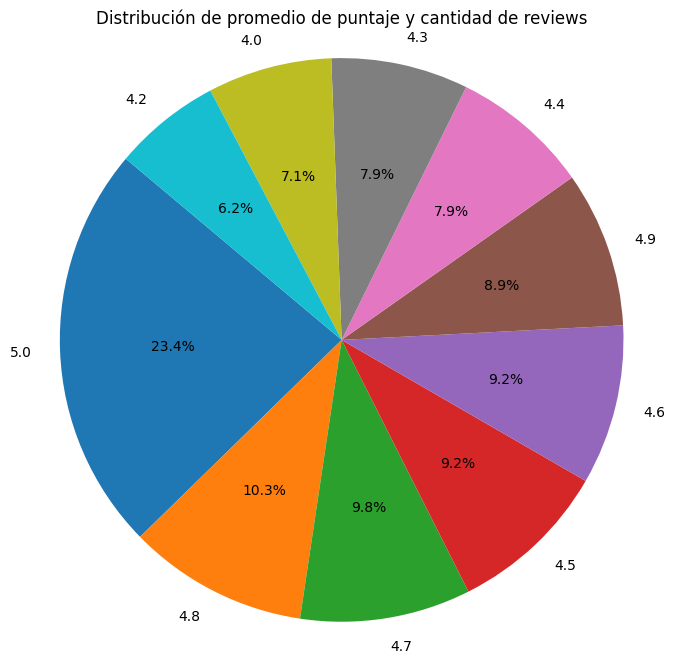

In [25]:
## aca lo mismo pero en grafico de barras
plt.figure(figsize=(8, 8))
plt.pie(avg_sorted10['num_of_reviews'], labels=avg_sorted10.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de promedio de puntaje y cantidad de reviews')
plt.axis('equal') 

In [27]:
metadata['latitude'].min()

-40.9293076

In [28]:
metadata['latitude'].max()

87.8565179

In [29]:
metadata['longitude'].min()

-178.80707619999998

In [30]:
metadata['longitude'].max()

180.0

In [31]:
unique_addresses= metadata['address'].unique()

In [32]:
unique_addresses = metadata.drop_duplicates(subset='address', keep='first')

In [34]:
# Definicion de funcion para poder filtrar la categoria "restaurant"
def contains_restaurant(category):
    return re.search(r'restaurant', category, re.IGNORECASE) is not None

# Mascara para poder aplicarle el filtro que queremos
mask = metadata['category'].apply(contains_restaurant)


filtered_df = metadata[mask]


In [35]:
filtered_df.shape

(212014, 13)

In [36]:
filtered_df.head()

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,['Korean restaurant'],4.4,18,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
6,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,['Restaurant'],4.5,18,"[['Thursday', '11AM–9:30PM'], ['Friday', '11AM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,NaN,https://www.google.com/maps/place//data=!4m2!3...
8,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,41.616079,-93.865487,"['Bakery', 'Health food restaurant']",4.7,21,"[['Thursday', '10AM–5:30PM'], ['Friday', '10AM...",{'Service options': ['Delivery']},Permanently closed,"['0x87ee974869295555:0x95f310d065882c9b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
68,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,['Restaurant'],4.0,8,NaN,"{'Service options': ['Delivery'], 'Amenities':...",NaN,"['0x89c6c62a40f4b733:0x73bfeec1898f272b', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
96,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,['Restaurant'],4.4,18,"[['Thursday', '11AM–8PM'], ['Friday', '11AM–8P...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"['0x7c00451360f80cf1:0x930291a38bab3132', '0x7...",https://www.google.com/maps/place//data=!4m2!3...


In [43]:
solo_adres= filtered_df[['address']]
solo_adres.head()

,address
2,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ..."
6,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,..."
8,"Sweet Rewards Gluten Free Bakery, LLC, 85 NE D..."
68,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P..."
96,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762"


In [58]:
solo_adres['address'] = solo_adres['address'].str.replace(' ', '')

In [62]:
solo.head()

,1,2,3,3,3,3,3,3,3,3
2,SanSooDang,761SVermontAve,LosAngeles,CA90005,None,None,None,None,None,None
6,VonsChicken,12740LaMiradaBlvd,LaMirada,CA90638,None,None,None,None,None,None
8,SweetRewardsGlutenFreeBakery,LLC,85NEDartmoorDr,Waukee,IA50263,None,None,None,None,None
68,ViviBubbleTea,701S5thSt,Philadelphia,PA19147,None,None,None,None,None,None
96,HalePops,55-370KamehamehaHwy,Laie,HI96762,None,None,None,None,None,None


In [57]:
solo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212014 entries, 2 to 3025006
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Calle          210956 non-null  object
 1   Ciudad         210954 non-null  object
 2   Estado         210920 non-null  object
 3   Código Postal  208405 non-null  object
 4   1              18598 non-null   object
 5   2              963 non-null     object
 6   3              122 non-null     object
 7   4              24 non-null      object
 8   5              6 non-null       object
 9   6              2 non-null       object
dtypes: object(10)
memory usage: 17.8+ MB
